## ARIMA(2, 1, 3) 데이터를 생성한 후, 1차 차분을 수행하고, 차분된 데이터의 ACF와 PACF를 그리며 최적의 ARIMA(p, d, q) 모델을 찾는 코드를 작성하겠습니다. 또한, 최적의 모델을 찾았을 때의 AIC와 BIC 값을 원래 모델과 비교하겠습니다.

### **1. 데이터 생성 및 1차 차분**

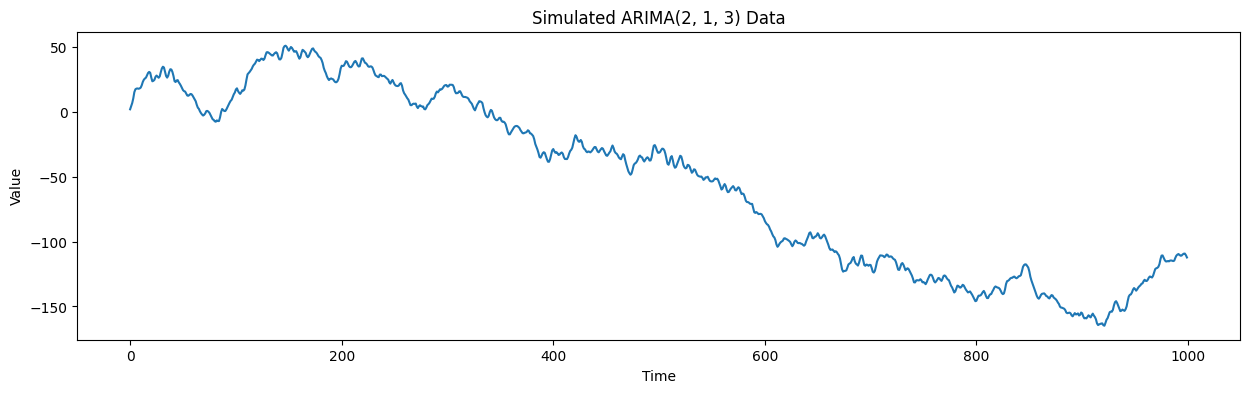

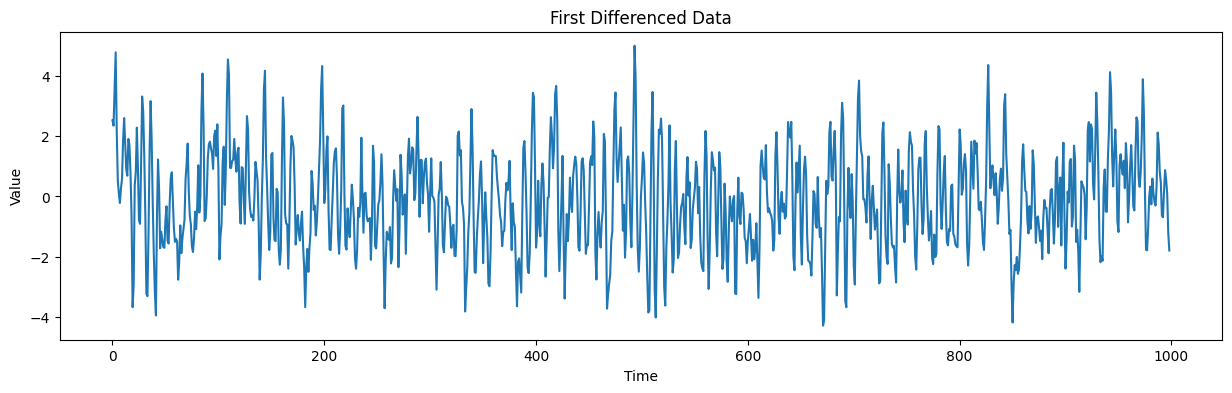

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# ARIMA(2, 1, 3) 데이터 생성
np.random.seed(0)
ar = np.array([1, -0.5, 0.3])  # AR part
ma = np.array([1, 0.7, 0.2, 0.1])  # MA part
arma_process = ArmaProcess(ar, ma)
data = arma_process.generate_sample(nsample=1000)
data = np.cumsum(data)  # Integrate to make it I(1)

# 1차 차분 수행
diff_data = np.diff(data)

# 원본 데이터 시각화
plt.figure(figsize=(15, 4))
plt.plot(data)
plt.title('Simulated ARIMA(2, 1, 3) Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# 차분된 데이터 시각화
plt.figure(figsize=(15, 4))
plt.plot(diff_data)
plt.title('First Differenced Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


## **2. ACF와 PACF 시각화**

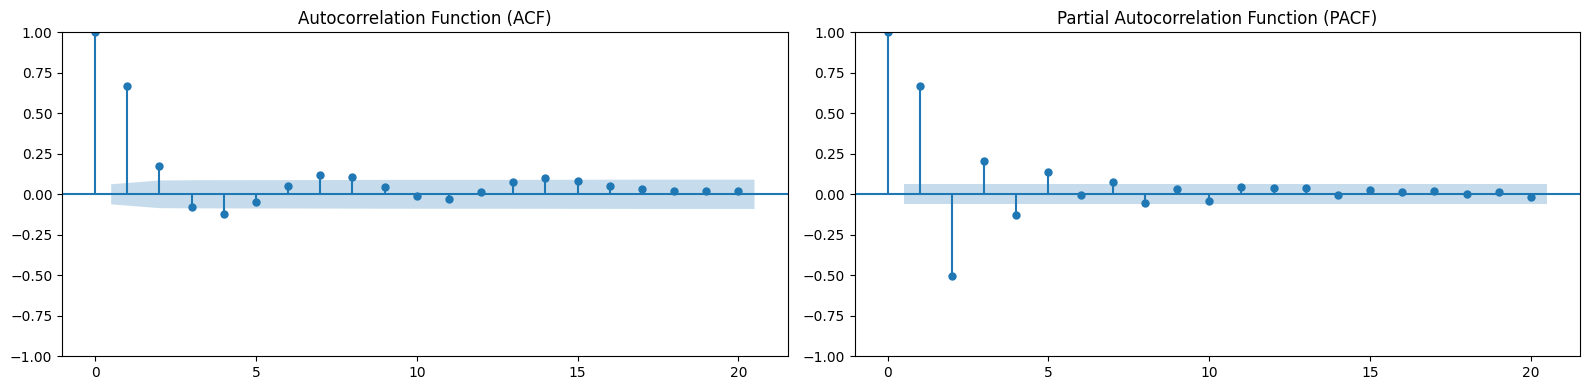

In [36]:
# ACF와 PACF 시각화 (차분된 데이터)
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

plot_acf(diff_data, lags=20, ax=ax[0])
ax[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(diff_data, lags=20, ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


## **3. 최적의 ARIMA(p, d, q) 모델 찾기**

In [39]:
# AR 및 MA 모델 적합성 평가 및 AIC, BIC 값 계산
aic_values = []; bic_values = []
orders = [(p, 1, q) for p in range(6) for q in range(6)]  # p와 q의 범위를 0부터 5까지 설정

for order in orders:
    try:
        model = ARIMA(data, order=order).fit()
        aic_values.append((order, model.aic))
        bic_values.append((order, model.bic))
    except:
        continue

# 가장 적합한 모델 찾기
optimal_order_aic = min(aic_values, key=lambda x: x[1])[0]
optimal_order_bic = min(bic_values, key=lambda x: x[1])[0]

print(f'Optimal order by AIC: {optimal_order_aic}')
print(f'Optimal order by BIC: {optimal_order_bic}')


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

Optimal order by AIC: (3, 1, 3)
Optimal order by BIC: (2, 1, 1)


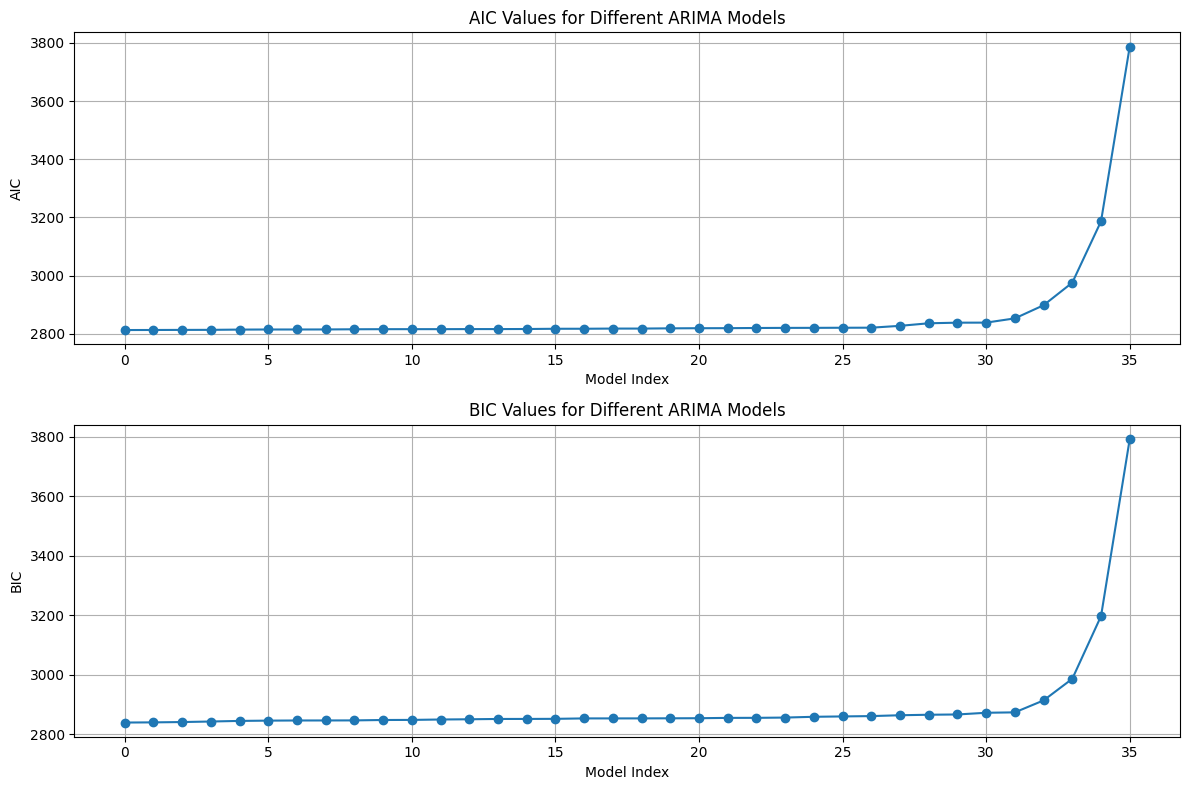

Original ARIMA(2, 1, 3) - AIC: 2816.618681207812, BIC: 2846.0592098797033
Optimal ARIMA by AIC (3, 1, 3) - AIC: 2813.337805869497, BIC: 2847.685089320037
Optimal ARIMA by BIC (2, 1, 1) - AIC: 2819.199569473371, BIC: 2838.826588587965


In [40]:
# AIC 및 BIC 값을 DataFrame으로 변환
aic_df = pd.DataFrame(aic_values, columns=['Order', 'AIC']).sort_values(by='AIC').reset_index(drop=True)
bic_df = pd.DataFrame(bic_values, columns=['Order', 'BIC']).sort_values(by='BIC').reset_index(drop=True)

# AIC 및 BIC 값 시각화
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

ax[0].plot(aic_df.index, aic_df['AIC'], marker='o')
ax[0].set_title('AIC Values for Different ARIMA Models')
ax[0].set_xlabel('Model Index')
ax[0].set_ylabel('AIC')
ax[0].grid(True)

ax[1].plot(bic_df.index, bic_df['BIC'], marker='o')
ax[1].set_title('BIC Values for Different ARIMA Models')
ax[1].set_xlabel('Model Index')
ax[1].set_ylabel('BIC')
ax[1].grid(True)

plt.tight_layout()
plt.show()

# 원래 모델(ARIMA(2, 1, 3))과 최적 모델의 AIC, BIC 비교
original_model = ARIMA(data, order=(2, 1, 3)).fit()
optimal_model_aic = ARIMA(data, order=optimal_order_aic).fit()
optimal_model_bic = ARIMA(data, order=optimal_order_bic).fit()

print(f'Original ARIMA(2, 1, 3) - AIC: {original_model.aic}, BIC: {original_model.bic}')
print(f'Optimal ARIMA by AIC {optimal_order_aic} - AIC: {optimal_model_aic.aic}, BIC: {optimal_model_aic.bic}')
print(f'Optimal ARIMA by BIC {optimal_order_bic} - AIC: {optimal_model_bic.aic}, BIC: {optimal_model_bic.bic}')